<h1>Chapter8 이미지를 위한 인공 신경망</h1>
<h5>1)합성곱 신경망의 구성 요소</h5>

In [1]:
#케라스 합성곱 층
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu',
                    padding='same', strides=1)

<Conv2D name=conv2d, built=False>

In [2]:
#폴링
keras.layers.MaxPooling2D(2, strides=2, padding='valid')

<MaxPooling2D name=max_pooling2d, built=False>

<h5>2)합성곱 신경망을 사용한 이미지 분류</h5>

In [3]:
#패션MNIST 데이터
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#합성곱 신경망 만들기
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                               padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                               padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

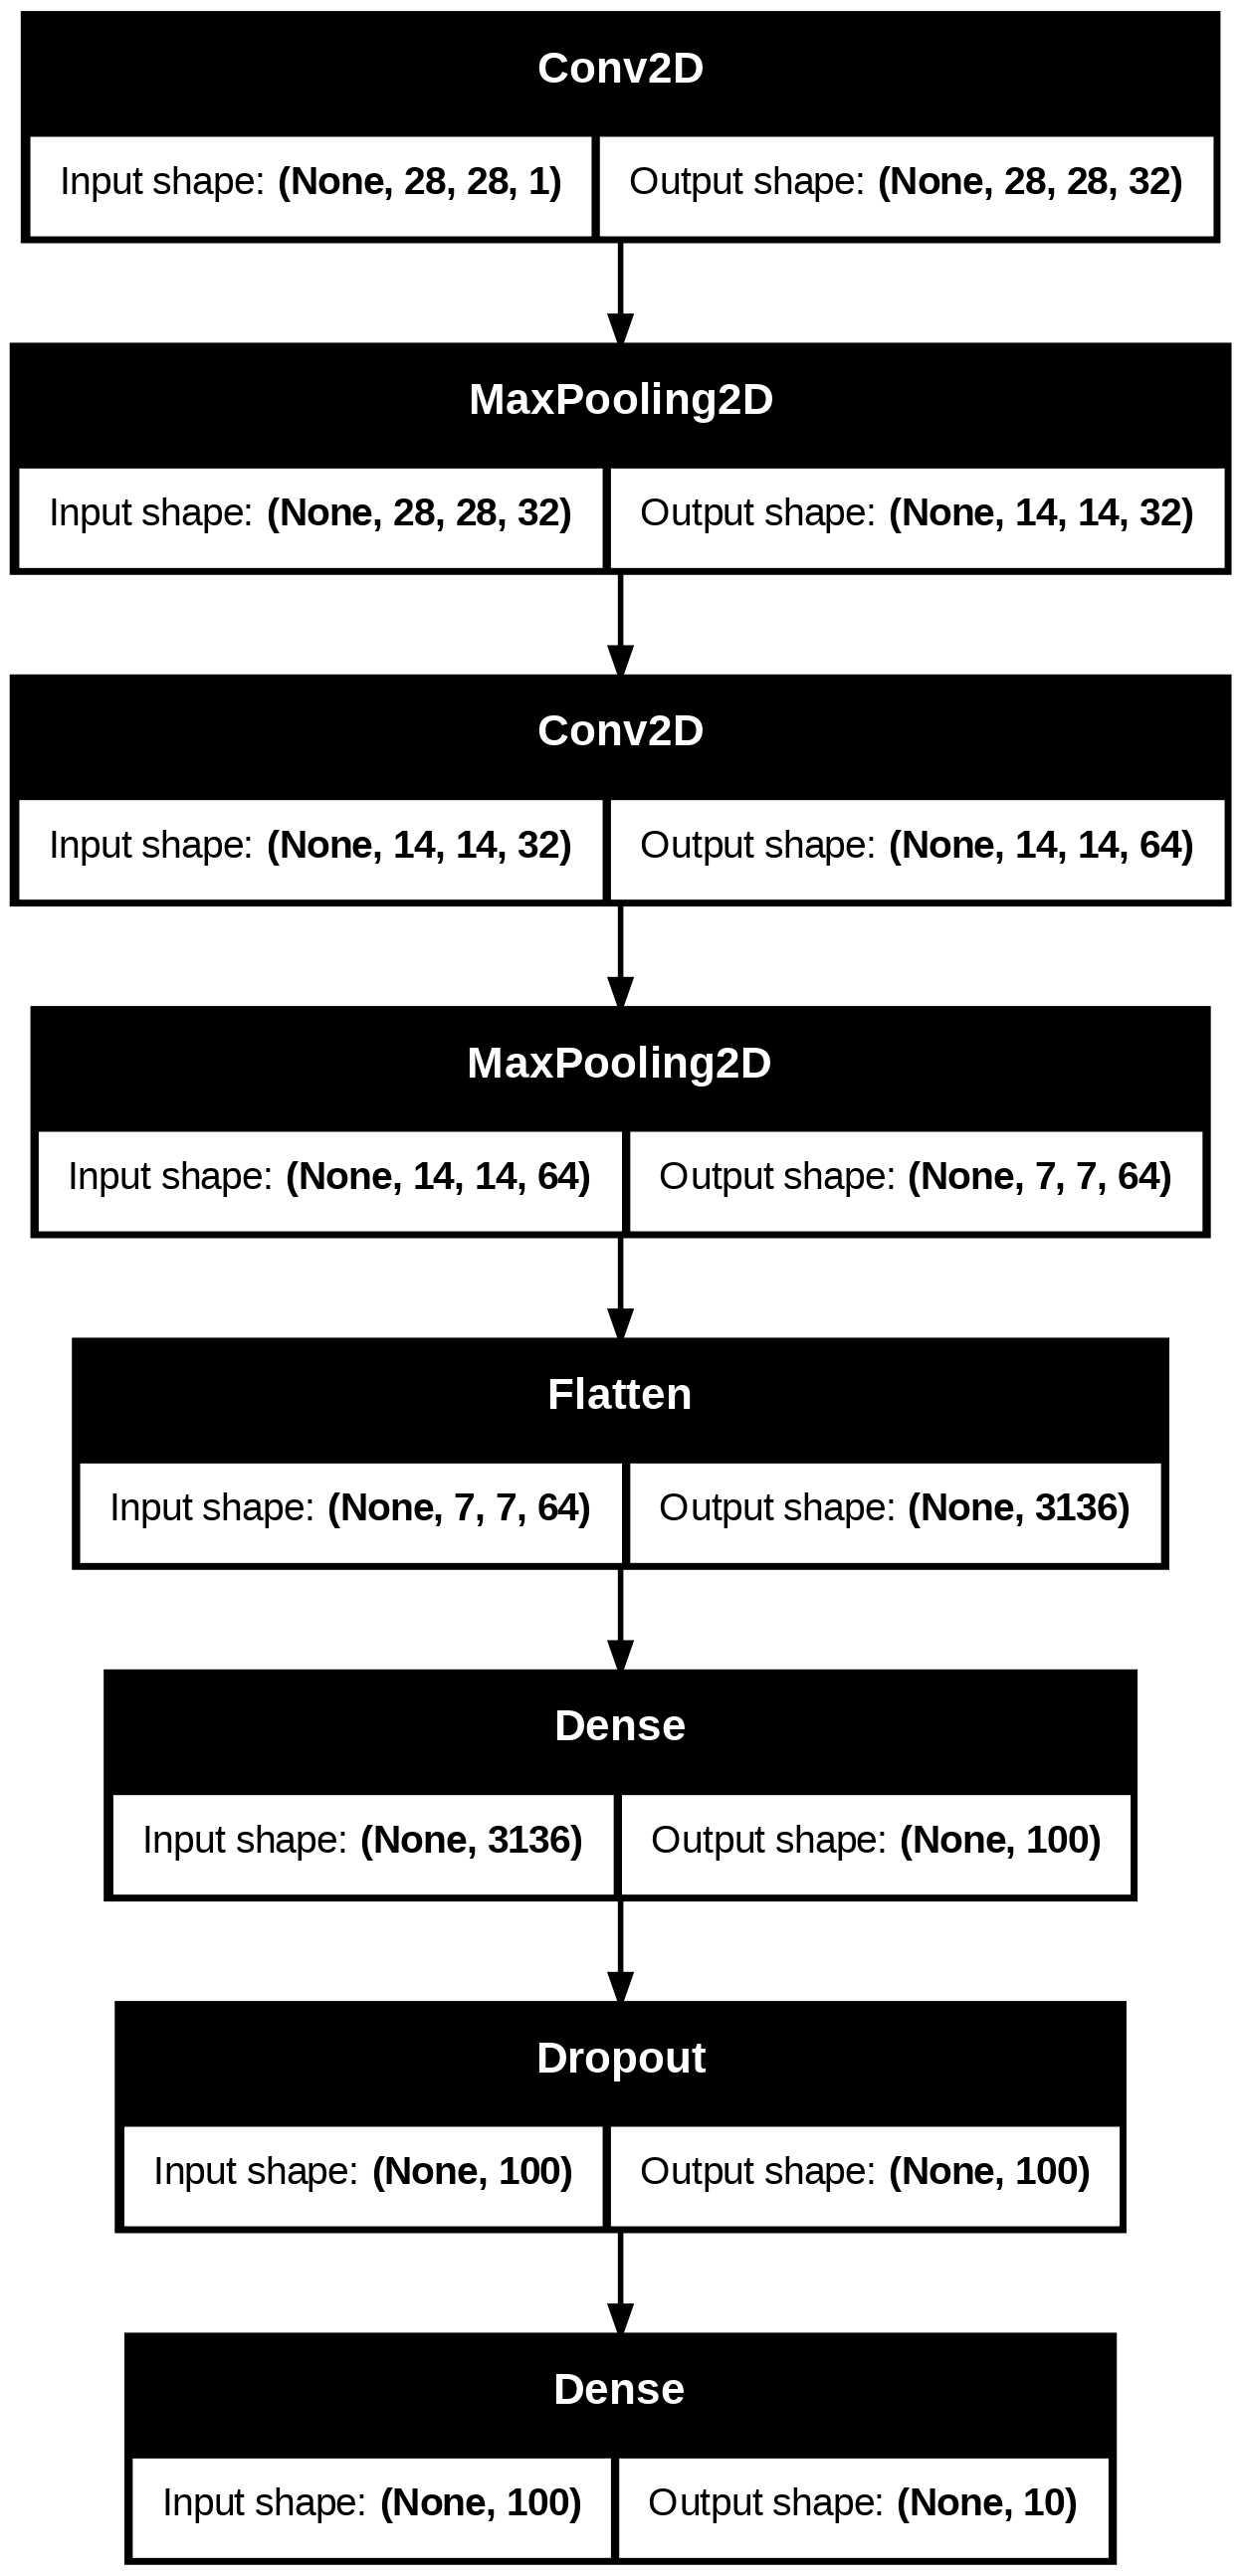

In [5]:
keras.utils.plot_model(model, show_shapes=True)

In [6]:
#모델 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.7367 - loss: 0.7318 - val_accuracy: 0.8756 - val_loss: 0.3421
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.8623 - loss: 0.3804 - val_accuracy: 0.8873 - val_loss: 0.2983
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.8858 - loss: 0.3148 - val_accuracy: 0.9009 - val_loss: 0.2662
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 88s 55ms/step - accuracy: 0.9004 - loss: 0.2731 - val_accuracy: 0.9077 - val_loss: 0.2506
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 142s 55ms/step - accuracy: 0.9092 - loss: 0.2440 - val_accuracy: 0.9103 - val_loss: 0.2412
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 139s 52ms/step - accuracy: 0.9157 - loss: 0.2286 - val_accuracy: 0.9123 - val_loss: 0.2364
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.9245 - loss: 0.2019 - val_accuracy: 0.9143 - val_loss: 0.2306
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 136s 51ms/step - accuracy: 0.928

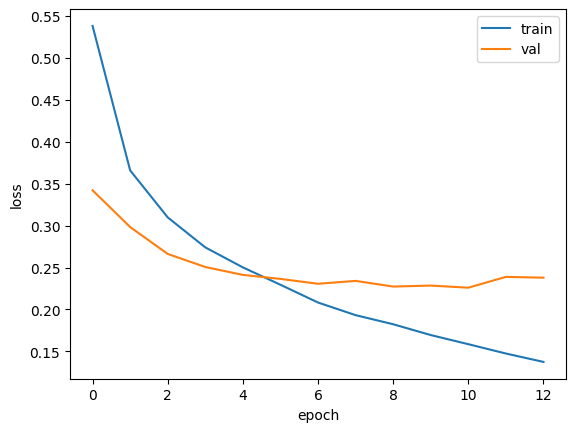

In [7]:
#손실그래프
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [8]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9239 - loss: 0.2159


[0.2259608805179596, 0.9225000143051147]

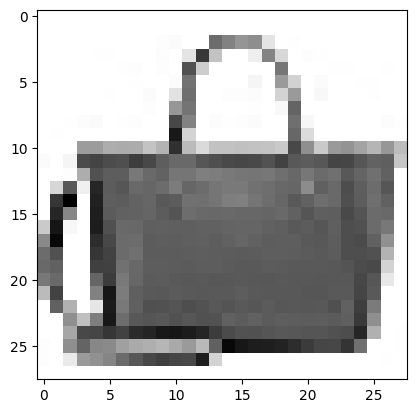

In [9]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [10]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[[4.5774289e-22 2.7038913e-26 3.0326167e-20 2.8428382e-24 3.1728493e-20
  5.0458923e-18 1.1196888e-18 3.7562992e-20 1.0000000e+00 1.4817198e-23]]


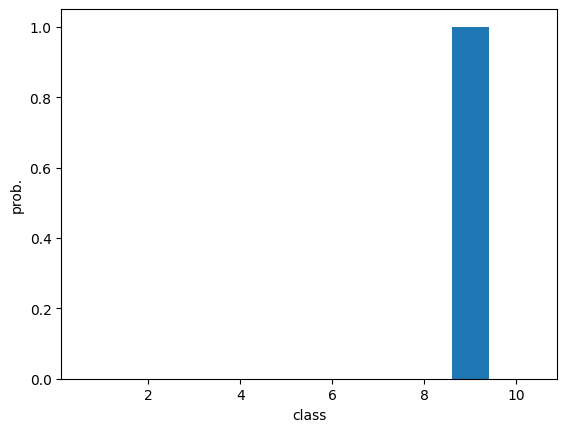

In [11]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [12]:
#확인
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

import numpy as np
print(classes[np.argmax(preds)])

가방


In [13]:
#예상 성능 측정
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9171 - loss: 0.2566


[0.24803562462329865, 0.9168000221252441]

<h5>3)합성곱 신경망의 시각화</h5>

In [14]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.keras')
model.layers

[<Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [15]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [16]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.015379106 0.2795479


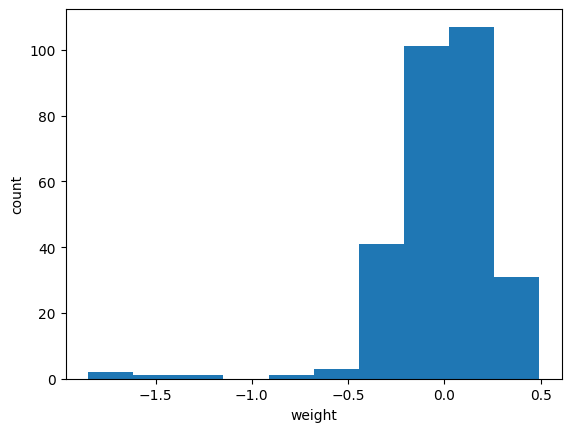

In [17]:
#가중치 분포
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

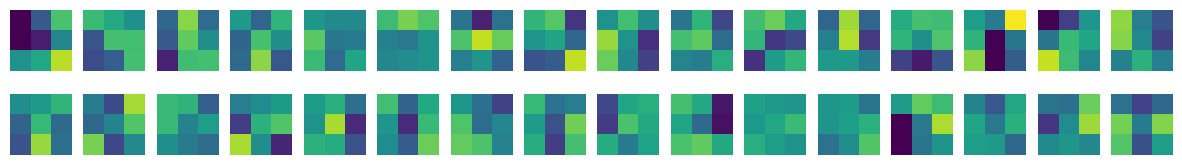

In [18]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [19]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                                          'relu', padding='same', input_shape=(28,28,1)))
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0009147425 0.081726655


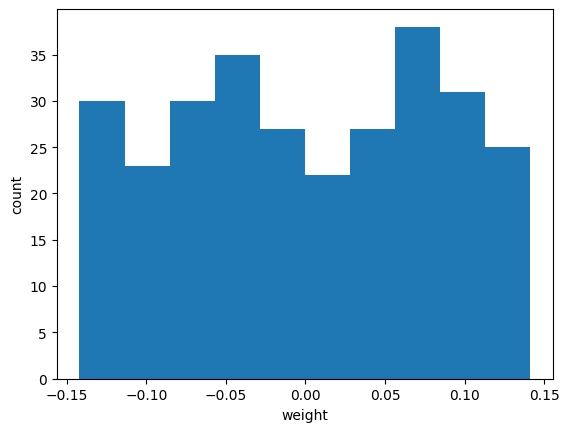

In [24]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

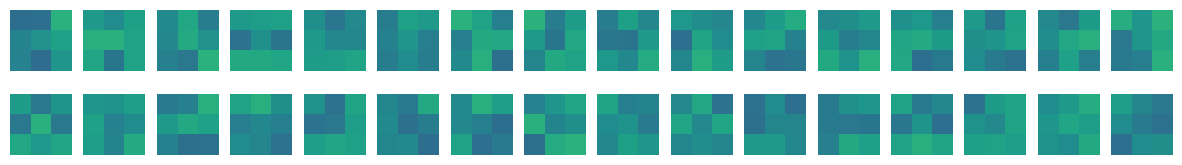

In [25]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [26]:
#함수형 API
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [27]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

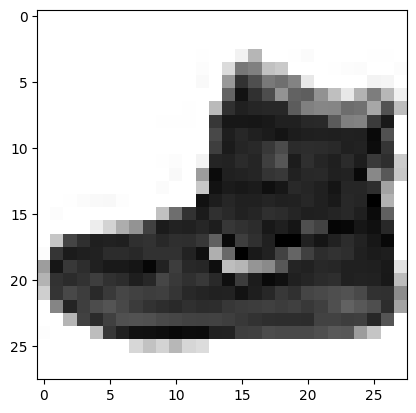

In [28]:
#특성 맵 시각화
(train_input, train_target), (test_input, test_target) =\
 keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [29]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
(1, 28, 28, 32)


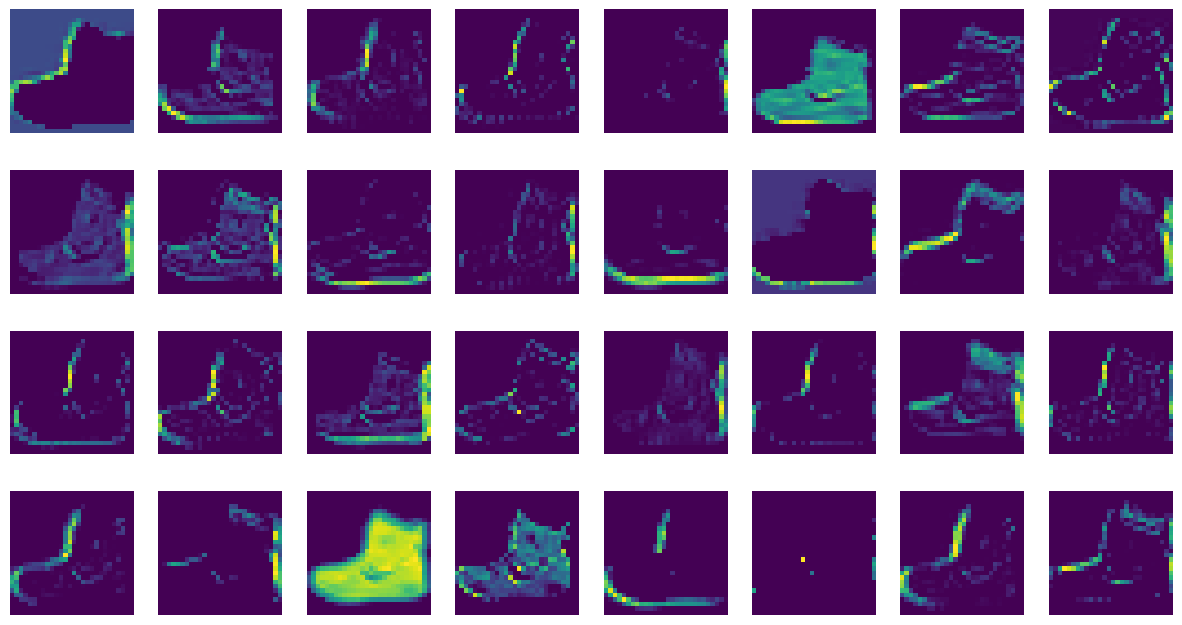

In [30]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [31]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
(1, 14, 14, 64)


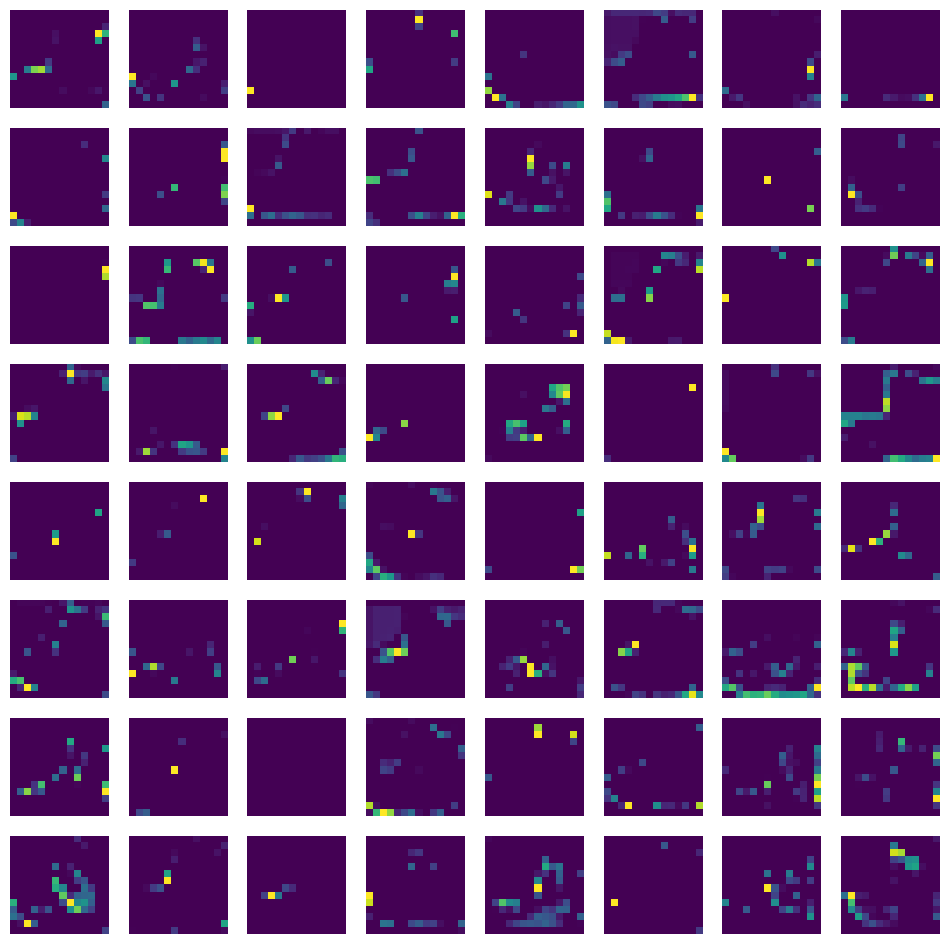

In [32]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()